<a href="https://colab.research.google.com/github/VinciGit00/Python/blob/main/NauralNetwork/Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images with hand written digits from 0 to 9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

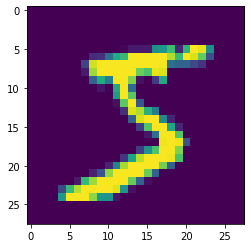

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [ ]:
#Otherwise with only 0 and 1s
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# Creation of the model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
#Output layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

model.compile(optimizer = "adam", 
              loss= "sparse_categorical_crossentropy" , 
              metrics= ['accuracy'] )

In [ ]:
mfit = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5436 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.9280
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2226 - accuracy: 0.9445
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1669 - accuracy: 0.9549
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9607
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1282 - accuracy: 0.9643
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1135 - accuracy: 0.9680
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1042 - accuracy: 0.9711
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9716
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.090

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (32, 784)                 0         
                                                                 
 dense_19 (Dense)            (32, 128)                 100480    
                                                                 
 dense_20 (Dense)            (32, 128)                 16512     
                                                                 
 dense_21 (Dense)            (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vall_loss, vall_acc = model.evaluate(x_test, y_test)
print(vall_loss, vall_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9673
0.14003358781337738 0.9672999978065491


Text(0, 0.5, 'Cost function')

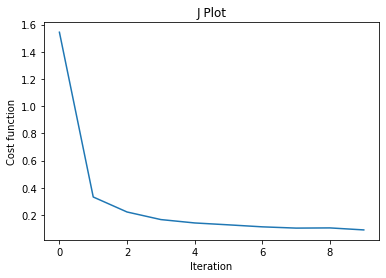

In [ ]:
import matplotlib.pyplot as plt
J = mfit.history['loss']
plt.plot(J)
plt.title("J Plot")
plt.xlabel("Iteration")
plt.ylabel("Cost function")
